### Importing necessory libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

### Importing dataset

In [2]:
data = pd.read_csv('backpain.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')

### Fixing the column names

As you might have noticed some of the column names have space instead of underscore and some of them start with an uppercase character, so replacing the space with underscore and uppercase letter with lowercase characters by defining a function.

In [5]:
def clean_column(df):
    df.columns = [c.replace(' ','_') for c in df.columns]
    df.columns = [c.lower() for c in df.columns]
    return df.columns

clean_column(data)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'status'],
      dtype='object')

In [6]:
# Checking the size of the dataset
data.shape

(310, 13)

In [7]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


### Checking the statistics of numerical column in the dataset

In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


### Checking for missing values

In [9]:
# Null value check
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
status                      0
dtype: int64

### Checking for duplicate rows

In [10]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


### Distribution of all the features

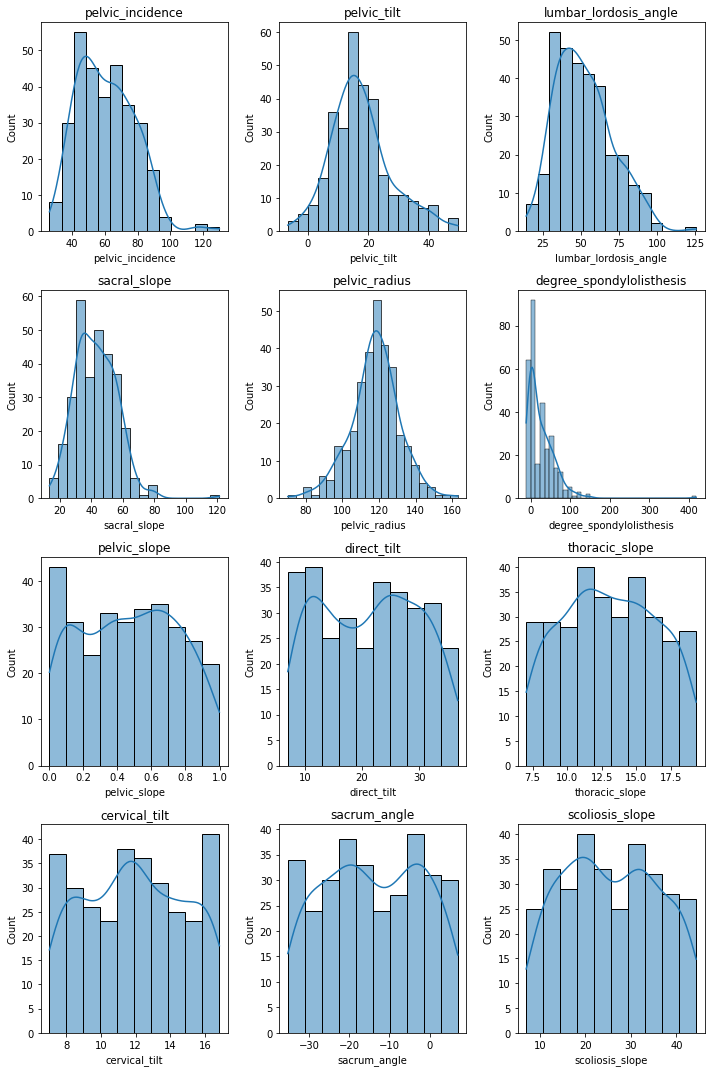

In [12]:
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10, 15))
titles=data.columns
ax_title_pairs = zip(axs.flat, titles)

for ax, column in ax_title_pairs:
    sns.histplot(x=column, data=data, ax=ax,kde=True)
    ax.set_title(column)

plt.tight_layout()

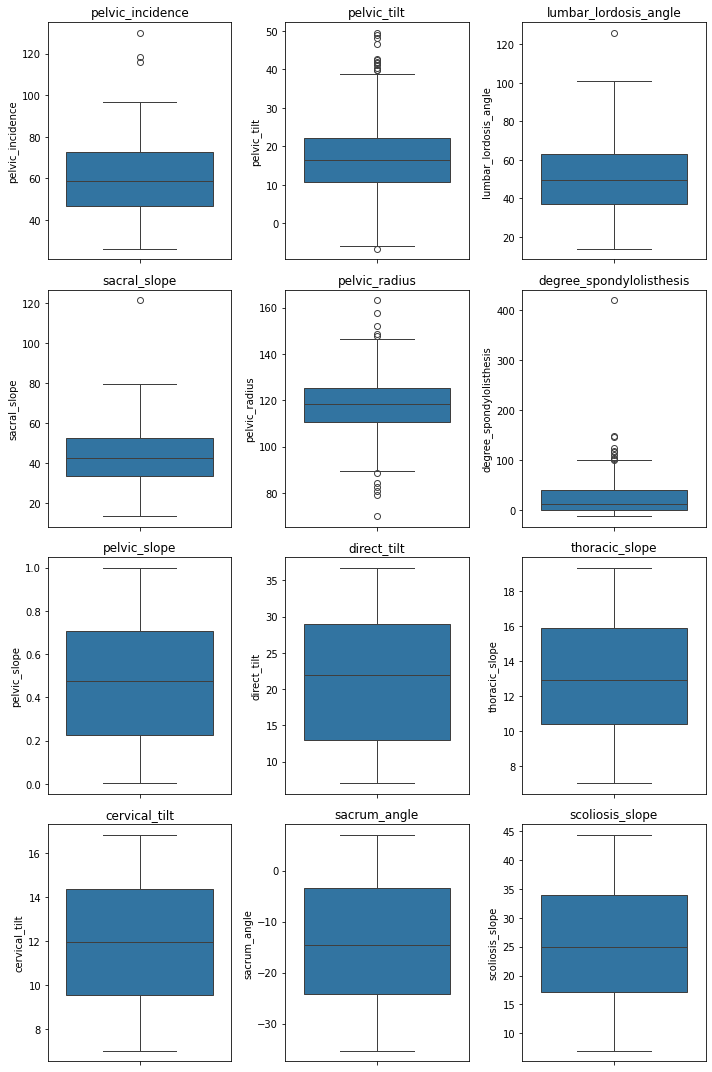

In [13]:
# Outlier Check

fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10, 15))
titles=data.columns
ax_title_pairs = zip(axs.flat, titles)

for ax, column in ax_title_pairs:
    sns.boxplot(y=column, data=data, ax=ax, orient='y')
    ax.set_title(column)

plt.tight_layout()

### Correlation Check with pairplot

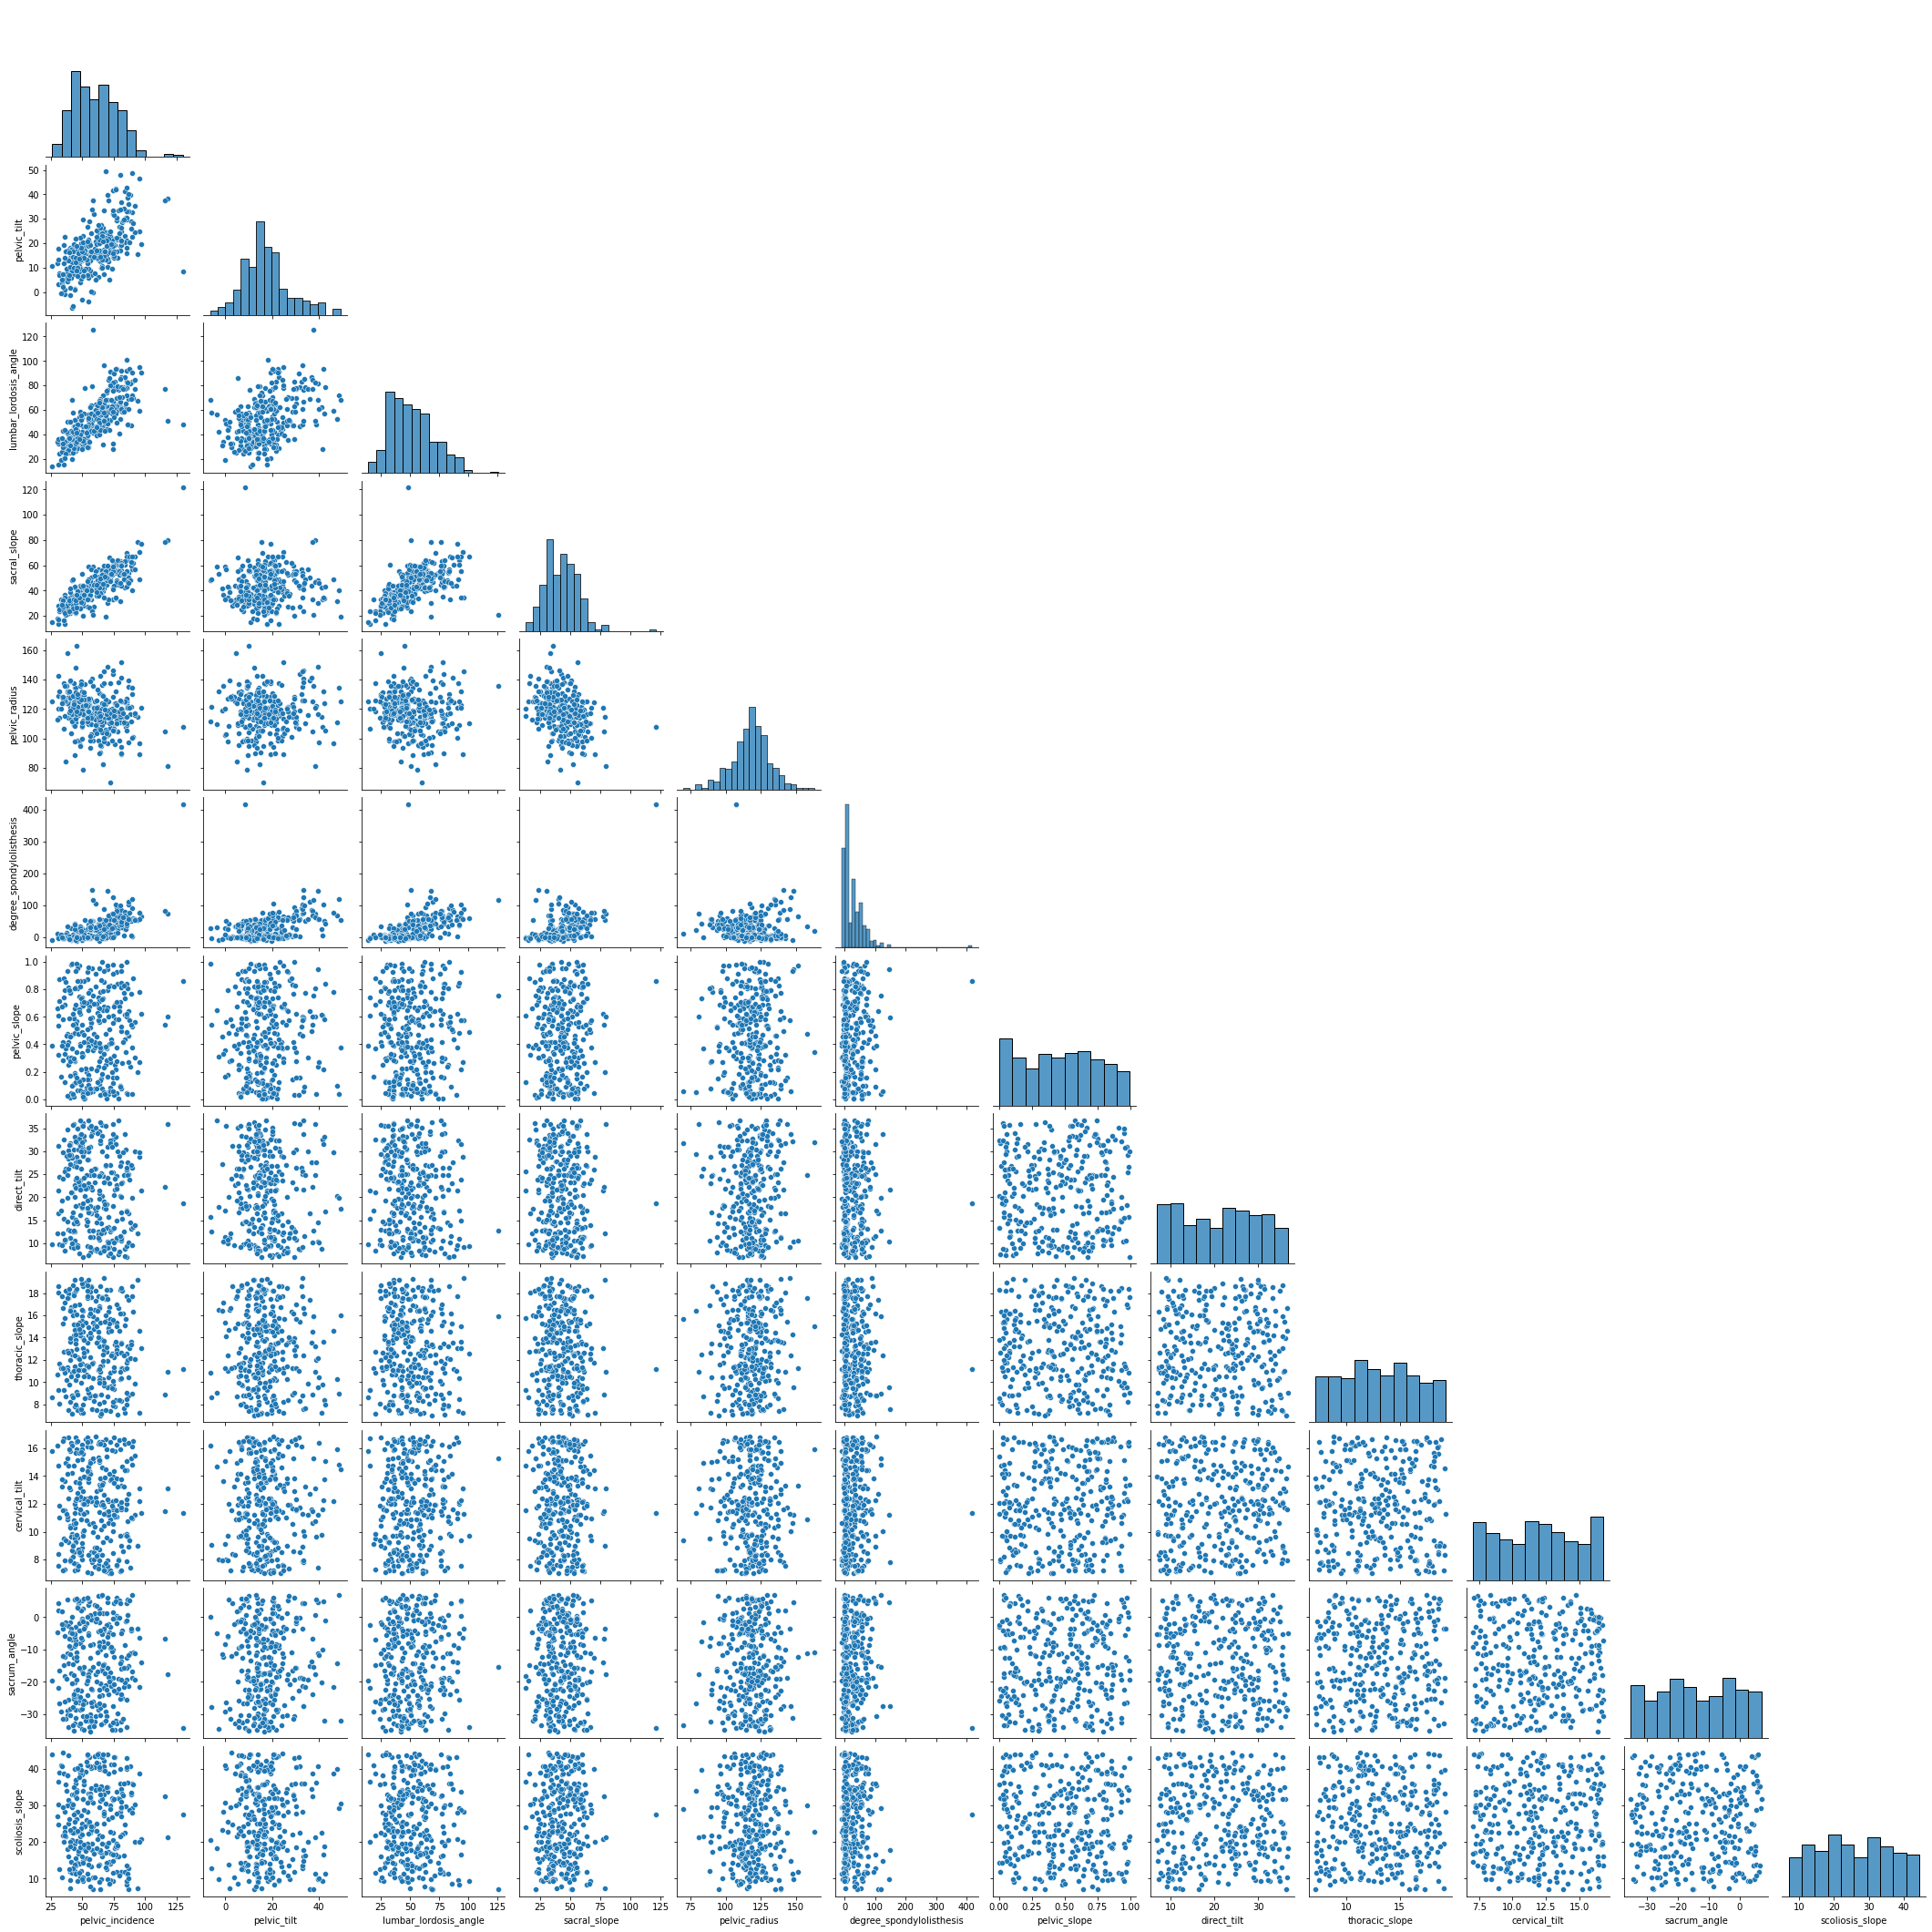

In [14]:
sns.pairplot(data, corner= True)
plt.show();

### Correlation Check with heatmap

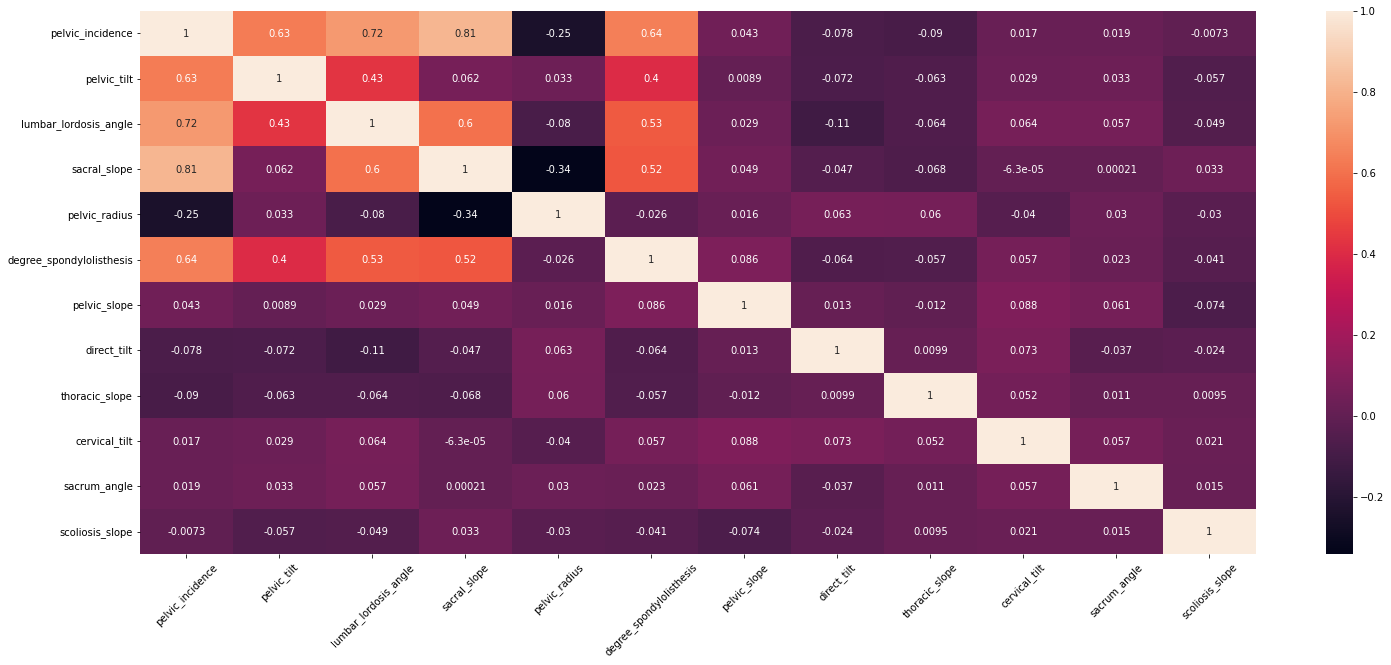

In [15]:

num_columns = [cols for cols in data.columns if data[cols].dtype!='object']
num_columns
plt.figure(figsize=(25,10))
heatmap=sns.heatmap(data[num_columns].corr(),annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.show()

The reason for the high correlation between pelvic incidence and features like pelvic tilt, lumbar lordosis angle, sacral slope and degree spondylolisthesis is because these angles are measured between the pelvic and spinal tail joint. So, a slight tilt in this joint, will reflect changes in all the pelvic and spondylolisthesis angles as shown in the fig

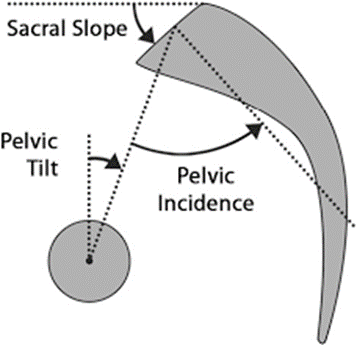


### Change target variable value for Abnormal to 1 and Normal to 0.

In [16]:
data = data.replace({"status": {'Abnormal':1,'Normal':0}})

In [17]:
data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,status
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,0


### Checking the percentage of normal and abnormal

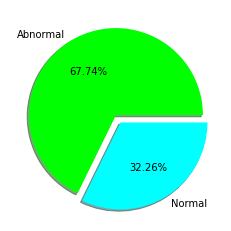

In [18]:
count_T = 0
count_F = 0
for i in data['status']:
    if i == 1:
        count_T+=1
    else:
        count_F+=1 
labels = ["Abnormal","Normal"]
sizes = [count_T,count_F]   
colors = ["lime", "cyan"]
explode = (0,0.10)
plt.pie(sizes, labels=labels, colors=colors, explode=explode,autopct="%1.2f%%",shadow=True)
plt.show()

### Making status column as a target variable 'y'.

In [19]:
X = data.drop('status',axis=1)
y = data.pop('status')

### Splitting the data into Train-Test in 70%-30%.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Training the data using Decision Tree.
As its a classification problem and there are some outliers so decided to train the data using Decision Tree Classifier as Decision Tree is faster and less sensitive to outliers.

#### Basic model of Decision tree without setting any parameters.

In [21]:
# Creating a Decision tree model and fitting training data
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [22]:
# Accuracy check for both train and test data
print('Accuracy on training set',dTree.score(X_train, y_train))
print('Accuracy on test set',dTree.score(X_test, y_test))

Accuracy on training set 1.0
Accuracy on test set 0.7741935483870968


In [23]:
# Distribution check for target variable
y_test.value_counts()

1    66
0    27
Name: status, dtype: int64

### Created a function to generate confusion matrix

In [24]:
# Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Normal","Actual - Abnormal"]],
                  columns = [i for i in ['Predicted - Normal','Predicted - Abnormal']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Created a function to generate recall score

In [25]:
#  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    return [metrics.recall_score(y_train,pred_train),metrics.recall_score(y_test,pred_test)]

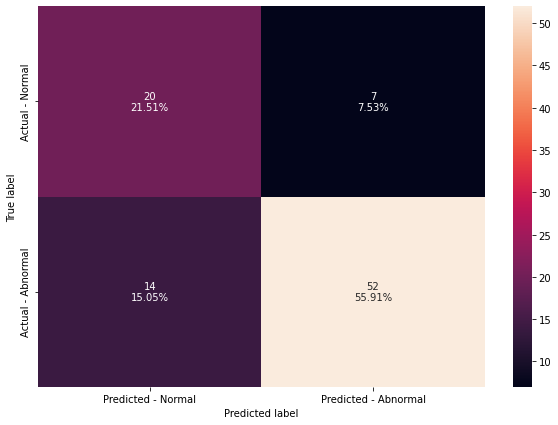

In [26]:
# Confusion matrix for decision tree
make_confusion_matrix(dTree,y_test)

In [27]:
# recall score on train and test data respectively
print('train_recall,test_recall:',get_recall_score(dTree))

train_recall,test_recall: [1.0, 0.7878787878787878]


In [28]:
feature_names = list(X.columns)
print(feature_names)

['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


In [29]:
# # Decision tree plotting
# plt.figure(figsize=(20,30))
# tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# plt.show()
# plt.tight_layout()

In [30]:
# Feature importance check
print(pd.DataFrame(dTree.feature_importances_,columns=['Imp'],index=X_train.columns))

                               Imp
pelvic_incidence          0.010322
pelvic_tilt               0.118683
lumbar_lordosis_angle     0.000000
sacral_slope              0.104975
pelvic_radius             0.111555
degree_spondylolisthesis  0.412395
pelvic_slope              0.013762
direct_tilt               0.058833
thoracic_slope            0.038605
cervical_tilt             0.058276
sacrum_angle              0.030965
scoliosis_slope           0.041630


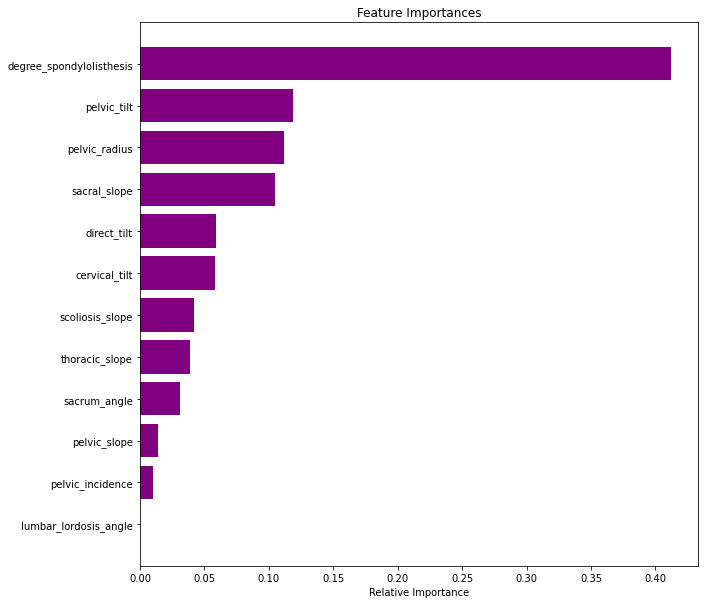

In [31]:
# Feature importance plot
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='purple', align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision tree defining max depth =3 and repeating the entire process

In [32]:
# applying pre-pruning by setting max_depth to 3.
dTree1 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

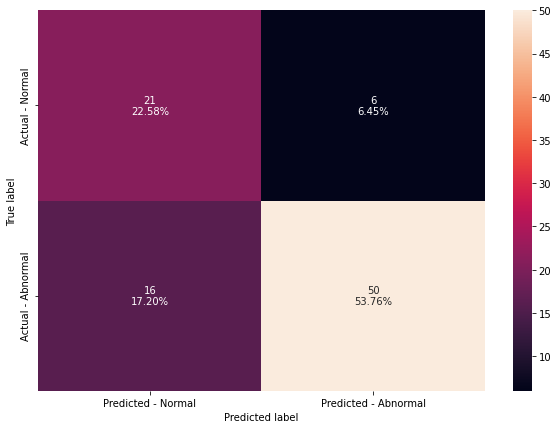

In [33]:
# Confusion matrix for pre-prunned decision tree
make_confusion_matrix(dTree1, y_test)

In [34]:
# Accuracy and recall check for pre-pruned decision tree
print('Accuracy on trainning set',dTree1.score(X_train, y_train))
print('Accuracy on test set',dTree1.score(X_test, y_test))
print('train_recall,test_recall:',get_recall_score(dTree1))

Accuracy on trainning set 0.8986175115207373
Accuracy on test set 0.7634408602150538
train_recall,test_recall: [0.8888888888888888, 0.7575757575757576]


In [35]:
# # Pre-pruned decision tree plot
# plt.figure(figsize=(20,20))
# tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# plt.show()

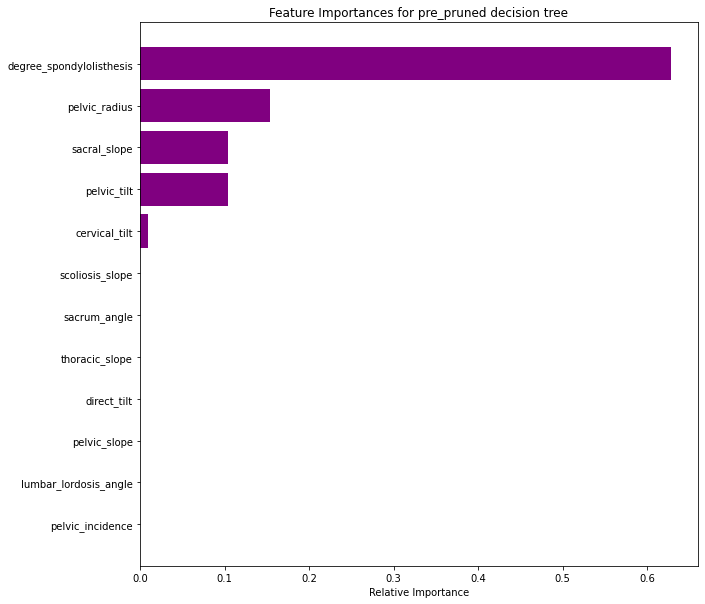

In [36]:
# Feature importance plot for pre-pruned decision tree
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances for pre_pruned decision tree')
plt.barh(range(len(indices)),importances[indices],color='purple', align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Finding best parameters using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Applying grid search to find best model for data
estimator = DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf':[1,2,5,7,10,15,20],
              'max_leaf_nodes':[2,3,5,10],
              'min_impurity_decrease':[0.001,0.01,0.1]
    }
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator,parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

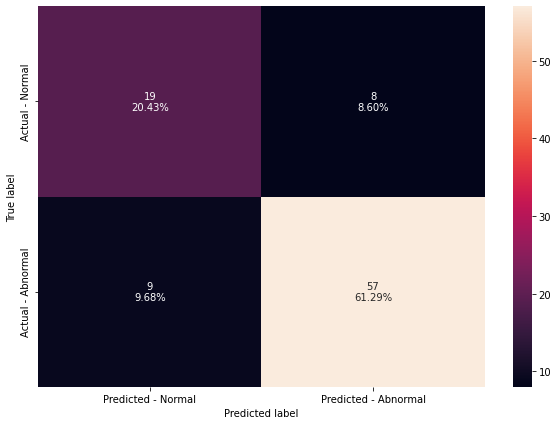

In [39]:
# Confusion matrix for estimator
make_confusion_matrix(estimator,y_test)

In [40]:
# Accuracy and recall for estimator
print('Accuracy on training set',estimator.score(X_train, y_train))
print('Accuracy on test set',estimator.score(X_test, y_test))
get_recall_score(estimator)

Accuracy on training set 0.9078341013824884
Accuracy on test set 0.8172043010752689


[0.9444444444444444, 0.8636363636363636]

In [41]:
# # Plot of estimator
# plt.figure(figsize=(20,20))
# tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# plt.show()

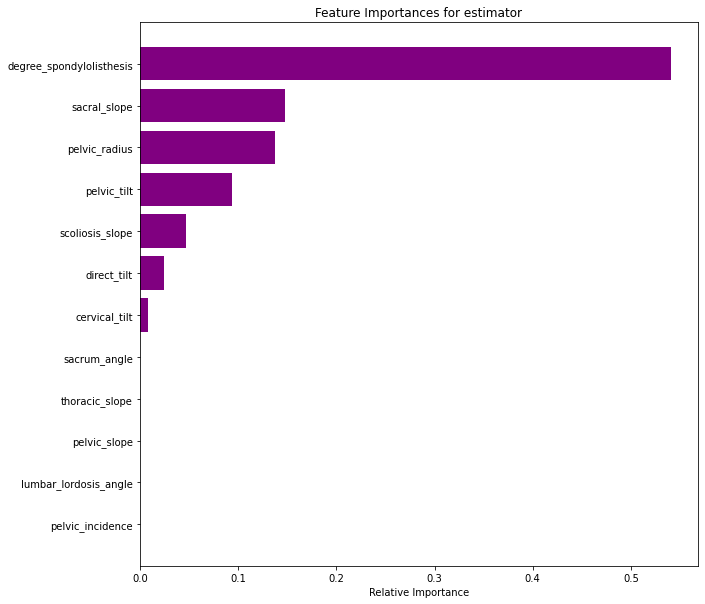

In [42]:
# Feature importance for estimator
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances for estimator')
plt.barh(range(len(indices)),importances[indices],color='purple', align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
# Procedure for post-pruning on the model
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [44]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568


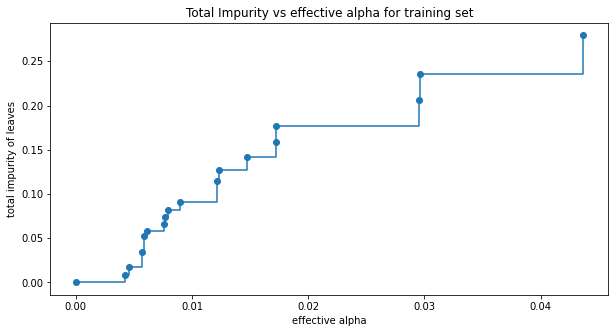

In [45]:
# Plot for Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [46]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16718273972032832


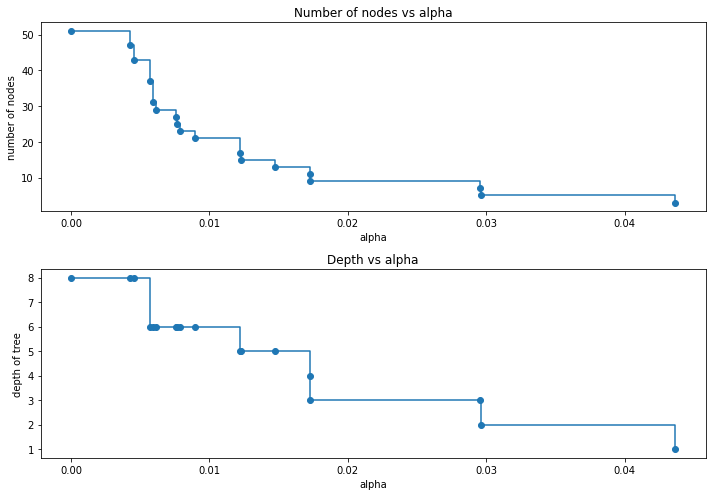

In [47]:
# Plot for Number of nodes vs alpha and Depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [48]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

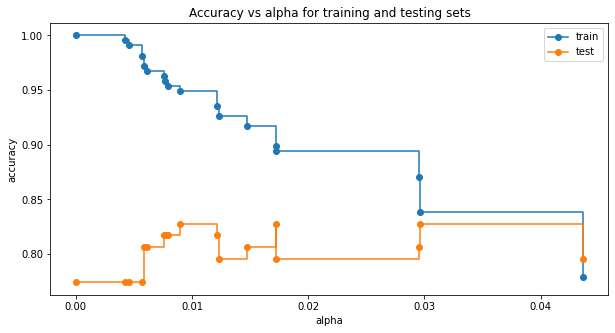

In [49]:
# Plot of Accuracy vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [50]:
# Accuracy check for post_pruned model
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.008980267044783167, random_state=1)
Training accuracy of best model:  0.9493087557603687
Test accuracy of best model:  0.8279569892473119


In [51]:
# Recall for train data
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [52]:
# Recall for test data
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

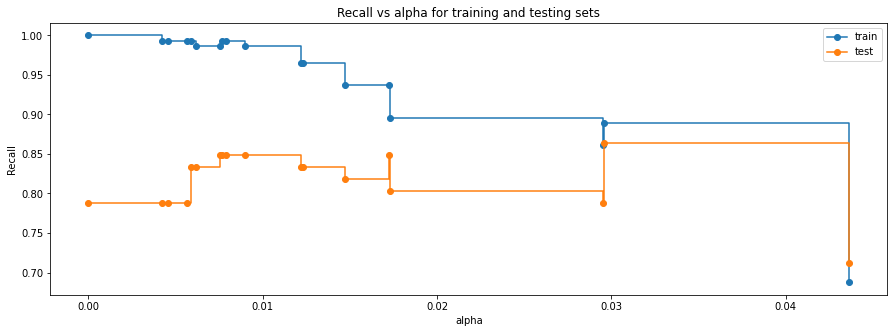

In [53]:
# PLot of Recall vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [54]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.029595494111623127, random_state=1)


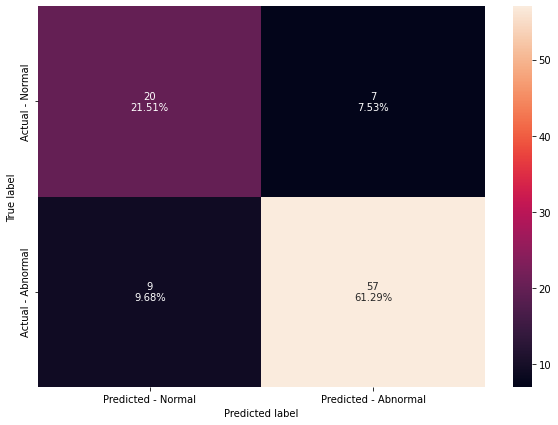

In [55]:
# Confusion matrix for best model
make_confusion_matrix(best_model,y_test)

In [56]:
# Final recall value for best model
get_recall_score(best_model)

[0.8888888888888888, 0.8636363636363636]

In [57]:
# # Plot of dicision tree for best model
# plt.figure(figsize=(10,10))
# tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# plt.show()

In [58]:
# Comparision for all the models
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth',
                                          'Decision treee with hyperparameter tuning','Decision tree with post-pruning'],
                                           'Train_Recall':[get_recall_score(dTree)[0],get_recall_score(dTree1)[0],
                                                           get_recall_score(estimator)[0],get_recall_score(best_model)[0]],
                                           'Test_Recall':[get_recall_score(dTree)[1],get_recall_score(dTree1)[1],
                                                          get_recall_score(estimator)[1],get_recall_score(best_model)[1]]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000000,0.787879
1,Decision tree with restricted maximum depth,0.888889,0.757576
2,Decision treee with hyperparameter tuning,0.944444,0.863636
3,Decision tree with post-pruning,0.888889,0.863636


1) The decision tree post pruning is giving better results with low variance and low bias as there is not much difference between the recall value of train data and test data.

2)Recall shows whether an ML model can find all objects of the target class therefore instead of correctly identifying normal spine patients, we stress in properly identifying patients with abnormality in their spine to provide  timely treatment to those patients.
